 **Student Marks Predictor **




Here we try to predict scores of students based on their number of hours devoted to their studies using a Linear regression model that provides the best-fit for the given set of Data.

**Importing the required python libraries**

In [39]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #library for machine learning algorithms

**Importing the required sample data**

We obtain the required sample data using kaggle dataset, the data format is in csv and thus we achieve to read the same using the inbuilt operator in pandas library

In [28]:
sample_data = pd.read_csv('student_scores.csv')
print("Retrieved data: \n")
sample_data

Retrieved data: 



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**lets first analyze the data**

In [42]:
sample_data.shape

(25, 2)

In [30]:
sample_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [31]:
sample_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Before progressing to the linear regression algorithm, we need to covert the sample data into arrays defining the independent and dependent variables denoted by arrays X and Y respectively.
This can be done using the "iloc" operation

In [33]:
X = sample_data.iloc[:,:-1].values #taking the values of hours and reshaping it to form a numpy array X
Y = sample_data.iloc[:,1].values #taking the values of scores and reshaping it to form a numpy array Y
print("Data converted into arrays! \n")

Data converted into arrays! 



**Check for linear progress:**

The first step in linear regression is to see whether the sample data shows a linear progress (i.e.,the points are not scattered rather they can be visualized accross a line). This check can be performed by plotting a 2-D graph oif the data points using the matplotlib library.

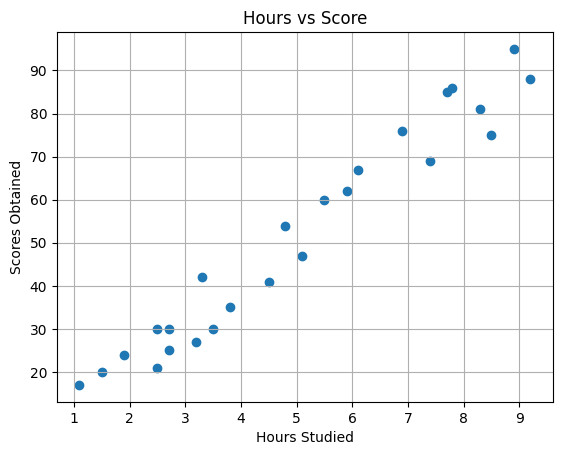

In [34]:
plt.scatter(X,Y) #plot the points
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.grid(5)
plt.show()

**Splitting the data into training and test cases**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Progressing with the linear regression:**

using the inbuilt Scikit-learn library we make the linear regression object and train the algorithm

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) #training the data for best fit
print("Linear regression model trained! \n")

Linear regression model trained! 



**Predicting the data:**

the formula used for prediction in Linear regression can be stated as:Y=Slope*x+Intercept.
where Slope=(y2-y1)/(x2-x1),Intercept=y-slope*x

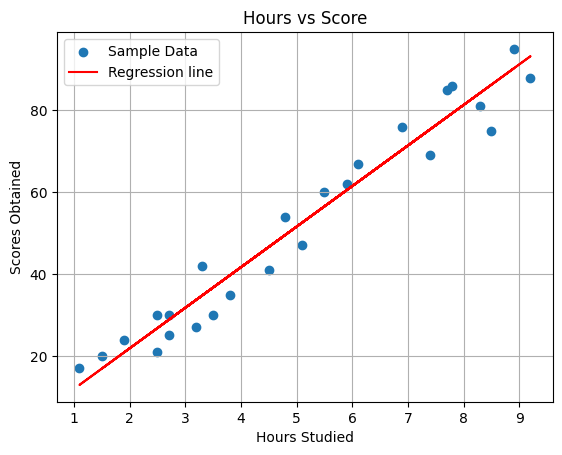

In [37]:
Y_predicted = lr_model.predict(X)
plt.scatter(X, Y, label="Sample Data")
plt.plot(X, Y_predicted, color='red', label="Regression line" )
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.legend("Sample Data")
plt.legend()
plt.grid(5)
plt.show()

Now that we have trained the model, we can use it to predict the marks corresponding to particular study hours.

In [ ]:
eg_hours = [[9.25]]
eg_pred = lr_model.predict(eg_hours)
print("No of Hours = {}".format(eg_hours))
print("Predicted Score = {}".format(eg_pred[0]))

**Checking our model:**

using coefficient of determination to get the number of squares that can be explained using our regression model

In [38]:
# Comparing Actual vs Predicted
y_pred = lr_model.predict(X_test) # Predicting the scores
corr_matrix = np.corrcoef(y_test,y_pred)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df)
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n\n Coefficient of determination = ", R_sq)
print("\n\n thus our Linear regression model can train:",R_sq*100 ,"% of data correctly")

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


 Coefficient of determination =  0.9617402761556325


 thus our Linear regression model can train: 96.17402761556325 % of data correctly
